In [0]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 45kB/s 
     |████████████████████████████████| 4.3MB 44.5MB/s 
     |████████████████████████████████| 501kB 69.2MB/s 


In [0]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 /root/kaggle/kaggle.json

chmod: cannot access '/root/kaggle/kaggle.json': No such file or directory


In [0]:
import pandas as pd

In [0]:
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

  0% 0.00/1.46M [00:00<?, ?B/s]
100% 1.46M/1.46M [00:00<00:00, 98.6MB/s]
  0% 0.00/1.39M [00:00<?, ?B/s]
100% 1.39M/1.39M [00:00<00:00, 199MB/s]
 85% 20.0M/23.4M [00:00<00:00, 32.9MB/s]
100% 23.4M/23.4M [00:00<00:00, 67.4MB/s]
 65% 17.0M/26.3M [00:00<00:00, 39.3MB/s]
100% 26.3M/26.3M [00:00<00:00, 87.8MB/s]


In [0]:
import zipfile
with zipfile.ZipFile('train.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('sample_data')

In [0]:
data=pd.read_csv('sample_data/train.csv')

In [0]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [0]:
data['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [0]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(data['comment_text'])
sequences = tokenizer.texts_to_sequences(data['comment_text'])
pad=pad_sequences(sequences,maxlen=120,padding='post',truncating='post')

In [0]:
sequence=np.array(sequences)

In [0]:
x_train=pad[:15000,:]
x_test=pad[15000:17250,:]

In [0]:
vocab_size=len(tokenizer.word_index)+1
seq_length=120
print(x_train.shape)

(15000, 120)


In [0]:
model = Sequential()
model.add(Embedding(vocab_size, 64, input_length=x_train.shape[1]))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(6, activation='sigmoid'))

In [0]:
y_data=data[data.columns[2:]]

In [0]:
y_data.shape

(159571, 6)

In [0]:
y_train=np.array(y_data[:15000])
y_test=np.array(y_data[15000:17250])

In [0]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [0]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Train on 15000 samples, validate on 2250 samples
Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
15000/15000 [==============================] - 85s 6ms/sample - loss: 0.1523 - accuracy: 0.9618 - val_loss: 0.1446 - val_accuracy: 0.9630
Epoch 2/5
15000/15000 [==============================] - 76s 5ms/sample - loss: 0.1427 - accuracy: 0.9631 - val_loss: 0.1437 - val_accuracy: 0.9630
Epoch 3/5
15000/15000 [==============================] - 76s 5ms/sample - loss: 0.1427 - accuracy: 0.9631 - val_loss: 0.1433 - val_accuracy: 0.9630
Epoch 4/5
15000/15000 [==============================] - 76s 5ms/sample - loss: 0.1426 - accuracy: 0.9631 - val_loss: 0.1431 - val_accuracy: 0.9630
Epoch 5/5
15000/15000 [==============================] - 76s 5ms/sample - loss: 0.1424 - accuracy: 0.9631 - val_loss: 0.1437 - val_accuracy: 0.9630


In [0]:
with zipfile.ZipFile('test.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('sample_data')

In [0]:
test_data=pd.read_csv("sample_data/test.csv")

In [0]:
t_pad=pad_sequences(sequences,maxlen=120,padding='post',truncating='post')

In [0]:
pred=model.predict(t_pad)

In [0]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

In [0]:
import matplotlib.pyplot as plt

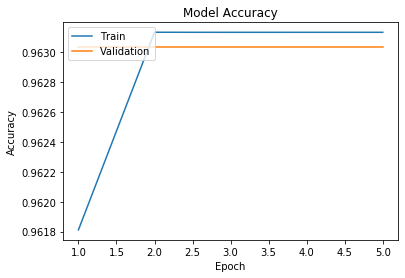

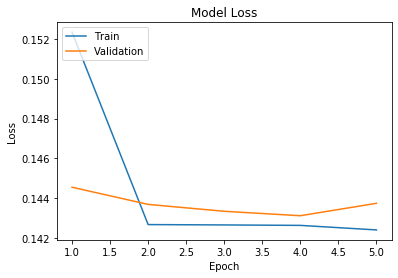

In [0]:
plotLearningCurve(history,5)

In [0]:
test_data.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [0]:
test=pad[17250:20000]

In [0]:
y_test1=np.array(y_data[17250:20000])

In [0]:
pred=model.evaluate(test,y_test1)

2750/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
pred

[0.15900676158341495, 0.9576968]